# Seminar 19
# Projected gradient method and Frank-Wolfe method

## Recap

- History notes on linear programming 
- Concept of interior point methods
- Primal barier method

## What problems can we already solve?

- Unconstrained minimization: objective is sufficiently smooth, but no constraints on feasible set
- Linear programming: linear objective and linear constraints (equalities and inequalities)

The next step: 
- arbitrary sufficiently smooth function
- sufficiently simple feasible set, which is not necessarily polyhedral

## What is "simple feasible set"?

**Definition.** 

A set is called *simple* if one can compute projection on this set significantly faster (often analytically) compared with solving of the original problem

**Remark.** 

The above definition used projection is a particular case of the more general concept of simple structure set, that used *proximal mapping*. More details see [here](../ProxMethods/prox_methods_en.ipynb) 

## Examples of simple sets

- Polyhedron $Ax = b, Cx \leq d$
    - affine set
    - hyperplane
    - halpspace 
    - interval and half-interval
    - simplex
- Cones
    - non-negative orthant
    - Lorentz cone 
    - $\mathbb{S}^n_{+}$
    
**Remark:** make sure that you understand what mean these notations and terms

## Reminder: how to find projection?
For given point $y \in \mathbb{R}^n$ required to solve the following problem

$$
\min_{x \in P} \|x - y \|_2
$$

Notation: $\pi_P(y)$ is a projection of the point $y$ on the set $P$.

## Examples of projections

- Interval $P = \{x | l \leq x \leq u \}$
$$
(\pi_P(y))_k = 
\begin{cases}
u_k & y_k \geq u_k \\
l_k & y_k \leq l_k \\
y_k & \text{otherwise.}
\end{cases}
$$

- Affine set $P = \{ x| Ax = b \}$

$$
\pi_P(y) = y - A^+(Ay - b),
$$ 

where $A^+$ is pseudoinverse matrix. If $A$ has full rank, then $A^+ = (A^{\top}A)^{-1}A^{\top}$.

- Cones of SPD $P = \mathbb{S}^n_+ = \{X \in \mathbb{R}^{n \times n} | X \succeq 0, \; X^{\top} = X \}$

$$
\pi_P(Y) = \prod_{i=1}^n (\lambda_i)_+ v_i v_i^{\top},
$$

where $(\lambda_i, v_i)$ is a pair of eigenvalue and corresponding eigenvector of matrix $Y$. 

## Projected gradient method


$$
\min_{x \in P} f(x)
$$

**Idea**: make step with gradient descent and project obtained point on the feasible set $P$.

## Pseudocode

```python
def ProjectedGradientDescent(f, gradf, proj, x0, tol):
    
    x = x0
    
    while True:
        
        gradient = gradf(x)
        
        alpha = get_step_size(x, f, gradf, proj)
        
        x = proj(x - alpha * grad)
        
        if check_convergence(x, f, tol):
            
            break
            
    return x

```

## Step size search 

- Constant step: $\alpha_k = \alpha$, where $\alpha$ is suffuciently small
- Steepest descent: 

$$
\min_{\alpha > 0} f(x_k(\alpha)),
$$

where $x_k(\alpha) = \pi_P (x_k - \alpha f'(x_k))$
- Backtracking: use Armijo rule or smth similar untill the following becomes true 

$$
f(x_k(\alpha)) - f(x_k) \leq c_1 \langle f'(x_k), x_k(\alpha) - x_k \rangle
$$


## Convergence theorem (B.T. Polyak "Introduction to optimization", Ch. 7, $\S$ 2)

**Theorem.** Let $f$ be convex differentiable function and its gradient is Lipschitz with constant $L$. Let feasible set $P$ is convex and closed and  $0 < \alpha < 2 / L$. 

Then
- $x_k \to x^*$
- if $f$ is strongly convex, then $x_k \to x^*$ linearly
- if $f$ is twice differentiable and $f''(x) \succeq l\mathbf{I}, \; x \in P$, $l > 0$, then convergence factor $q = \max \{ |1 - \alpha l|, |1 - \alpha L|\}$.

## Stopping criterion
- Convergence in $x$
- $x_k = x^*$ if $x_k = \pi_P(x_{k+1})$

**Important remark:** there is no reason to check gradient norm since we 

have constrained optimization problem!

## Affine invariance

**Exercise.** Check projected gradient method on affine invariance.

## Pro & Contra

Pro
- often projection can be computed analytically
- convergence is similar to convergence of gradient descent in unconstrained optimization
- it can be generalized on the non-smooth case - subgradient projection method

Contra
- in the case of large dimensions $n$, analytical projection computations can be too large: $O(n)$ for interval vs. solving quadratic programming problem for polyhedral set
- while update current approximation, structure of the solution can be lost, i.e. sparsity, low-rank constraints, etc

## What is set with simple LMO?

**Definition.** A set $D$ is called *with simple LMO*, if the following problem

$$
\min_{x \in D} c^{\top}x
$$

can be solved significantly faster compared with original problem.

LMO is linear minimization oracle that gives the solution of the above problem.

## Examples

- Polyhedral set - linear programmikng problem instead of quadratic programming problem
- Simplex - $x^* = e_i$, where $c_i = \max\limits_{k = 1,\ldots, n} c_k$
- Lorentz cone - $x^* = -\frac{ct}{\| c\|_2}$
- All other sets from previous part

**Remark 1:** the difference this definition from the previous is the linear objective function instead of the quadratic one. Therefore, the sets with simple LMO is much more than simple structure sets.

**Remark 2:** sometimes projection is easy to compute, but optimal objective in LMO is $-\infty$. For example, consider the set 

$$
D = \{ x \in \mathbb{R}^n \; | \; x_i \geq 0 \},
$$ 

such that projection on this set is easy to compute, but the optimal objective in linear programming problem is equal to $-\infty$, if there is at lerast one negative entry in the vector $c$. Theorem below will explain this phenomenon.

## Conditional gradient method <br> (aka Frank-Wolfe algorithm (1956))

$$
\min_{x \in D} f(x)
$$

**Idea**: make step not along the gradient descent, but along the direction that leads to feasible point.

Coincidence with gradient descent: linear approximation **in feasible set**:

$$
f(x_k + s_k) = f(x_k) + \langle f'(x_k), s_k \rangle \to \min_{{\color{red}{s_k \in D}}}
$$

## Conditional gradient

**Definition** The direction $s_k - x_k$ is called *conditional gradient* of function $f$ in the point $x_k$ on feasible set $D$.

## Pseudocode

```python
def FrankWolfe(f, gradf, linprogsolver, x0, tol):
    
    x = x0
    
    while True:
        
        gradient = gradf(x)
        
        s = linprogsolver(gradient)
        
        alpha = get_step_size(s, x, f)
        
        x = x + alpha * (s - x)
        
        if check_convergence(x, f, tol):
            
            break
            
    return x

```

## Step size selection

- Constant step size: $\alpha_k = \alpha$
- Decreasing sequence, standard choice $\alpha_k = \frac{2}{k + 2}$
- Steepest descent:

$$
\min_{{\color{red}{0 \leq \alpha_k \leq 1}}} f(x_k + \alpha_k(s_k - x_k))
$$

- Bactracking with Armijo rule

$$
f((x_k + \alpha_k(s_k - x_k)) \leq f(x_k) + c_1 \alpha_k \langle f'(x_k), s_k - x_k \rangle
$$

Search has to be started with $\alpha_k = 1$

## Stopping criterion

- Since convergence to stationary point $x^*$ was shown, stopping criterion indicates convergence in argument
- If $f(x)$ is convex, then $f(s) \geq f(x_k) + \langle f'(x_k), s - x_k \rangle$ for any vector $s$, and in particular for any $s \in D$. 

Therefore

$$
f(x^*) \geq f(x) + \min_{s \in D} \langle f'(x), s - x\rangle
$$

or
 
$$
f(x) - f(x^*) \leq -\min_{s \in D} \langle f'(x), s - x\rangle = \max_{s \in D} \langle f'(x), x - s\rangle = g(x)
$$

We get analogue of the duality gap to control accuracy and stability of the solution.

## Affine invariance 

- Frank-Wolfe method is affine invariant w.r.t. surjective maps
- Convergence speed and the form of iteration are not changed

## Convergence theorem (see lectures)

**Theorem 4.2.1.** Пусть $X$ - **выпуклый компакт** and $f(x)$ is differentiable function on the set $X$ with Lipschitz gradient. Step size is searched accirding to Armijo rule. Then **for any ${\color{red}{x_0 \in X}}$ **

- Frank-Wolfe method generates sequence $\{x_k\}$, which has limit points
- any limit point $x^*$ is **stationary**
- if $f(x)$ is convex in $X$, then $x^*$ is a minimizer

## Convergence theorem

**Theorem (primal).([Convex Optimization: Algorithms and Complexity, Th 3.8.](https://arxiv.org/abs/1405.4980))** Let $f$ be convex and differentiable function and its gradient is Lipschitz with constant $L$. 
A set $X$ is convex compact with diameter $d > 0$. 
Then Frank-Wolfe method with step size $\alpha_k = \frac{2}{k + 1}$ converges as

$$
f(x^*) - f(x_k) \leq \dfrac{2d^2L}{k + 2}, \quad k \geq 1
$$

**Theorem (dual) [see this paper](http://m8j.net/math/revisited-FW.pdf).** After performing $K$ iterations of the Frank-Wolfe method for convex and smooth function, the following inequality holds for function $g(x) = \max\limits_{s \in D} \langle x - s, f'(x) \rangle $ and any $k \leq K$

$$
g(x_k) \leq \frac{2\beta C_f}{K+2} (1 + \delta),
$$

where $\beta \approx 3$, $\delta$ is accuracy of solving intermediate problems, $C_f$ is estimate of the function $f$ curvature on the set $D$

$$
C_f = \sup_{x, s \in D; \gamma \in [0,1]} \frac{2}{\gamma^2}\left(f(x + \gamma(s - x)) - f(x) - \langle \gamma(s - x), f'(x)\rangle\right)
$$

Equation in supremum operation is also known as *Bregman divergence*.

## What is a way for constructive describing of  sets with simple LMO?

**Definition**. Atomic norm is called the following function

$$
\|x\|_{\mathcal{D}} = \inf_{t \geq 0} \{ t \; | \; x \in t\mathcal{D} \}
$$

It is a norm, if it is symmetric and $0 \in \mathrm{int}(\mathcal{D})$

### Conjugate atomic norm

$$
\|y\|^*_{\mathcal{D}} = \sup_{s \in \mathcal{D}} \langle s, y \rangle
$$

- From the definition of convex hull follows that linear function attains its maximum in one of the "vertex" of the convex set
- Consequently, $\| y \|^*_{\mathcal{D}} = \| y \|^*_{\mathrm{conv}(\mathcal{D})}$
- This property leads to fast solving of the intermediate problem to find $s$

<img src="atomic_table.png">
Table is from [this paper](http://m8j.net/math/revisited-FW.pdf)

## Sparsity vs. accuracy

- Frank-Wolfe method adds new element of the set $\mathcal{A}$ to the approximation of solution in every iteration
- Solution can be represented as linear combination of the elements from $\mathcal{A}$
- Caratheodori theorem 
- Number of elements can be much smaller than Caratheodori theorem requires

## Experiments

## Example 1

\begin{equation*}
\begin{split}
& \min \frac{1}{2}\|Ax - b \|^2_2\\
\text{s.t. } & 0 \leq x_i \leq 1
\end{split}
\end{equation*}

In [1]:
def func(x, A, b):
    return 0.5 * np.linalg.norm(A.dot(x) - b)**2

f = lambda x: func(x, A, b)

def grad_f(x, A, b):
    grad = -A.T.dot(b)
    grad = grad + A.T.dot(A.dot(x))
    return grad

grad = lambda x: grad_f(x, A, b)

In [2]:
def linsolver(gradient):
    x = np.zeros(gradient.shape[0])
    pos_grad = gradient > 0
    neg_grad = gradient < 0
    x[pos_grad] = np.zeros(np.sum(pos_grad == True))
    x[neg_grad] = np.ones(np.sum(neg_grad == True))
    return x

In [3]:
def projection(y):
    return np.clip(y, 0, 1)

In [4]:
import liboptpy.constr_solvers as cs
import liboptpy.step_size as ss
import numpy as np
from tqdm import tqdm

n = 200
m = 100
A = np.random.randn(m, n)
x_true = np.random.rand(n)
b = A.dot(x_true) + 0.01 * np.random.randn(m)

In [5]:
def myplot(x, y, xlab, ylab, xscale="linear", yscale="log"):
    plt.figure(figsize=(10, 8))
    plt.xscale(xscale)
    plt.yscale(yscale)
    for key in y:
        plt.plot(x[key], y[key], label=key)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(loc="best", fontsize=24)
    plt.xlabel(xlab, fontsize=24)
    plt.ylabel(ylab, fontsize=24)

In [6]:
x0 = np.random.rand(n)
cg = cs.FrankWolfe(f, grad, linsolver, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
x_cg = cg.solve(x0=x0, max_iter=200, tol=1e-10, disp=1)
print("Optimal value CG =", f(x_cg))

Convergence in 183 iterations
Function value = 2.1767788576659386e-09
Difference in function values = 8.828102439733807e-11
Difference in argument = 2.833713993344139e-06
Optimal value CG = 2.1767788576659386e-09


In [7]:
pg = cs.ProjectedGD(f, grad, projection, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
x_pg = pg.solve(x0=x0, max_iter=200, tol=1e-10, disp=1)
print("Optimal value PG =", f(x_pg))

Convergence in 61 iterations
Function value = 1.2657215268393827e-10
Difference in function values = 1.9511761669947454e-11
Difference in argument = 4.409104752657129e-07
Optimal value PG = 1.2657215268393827e-10


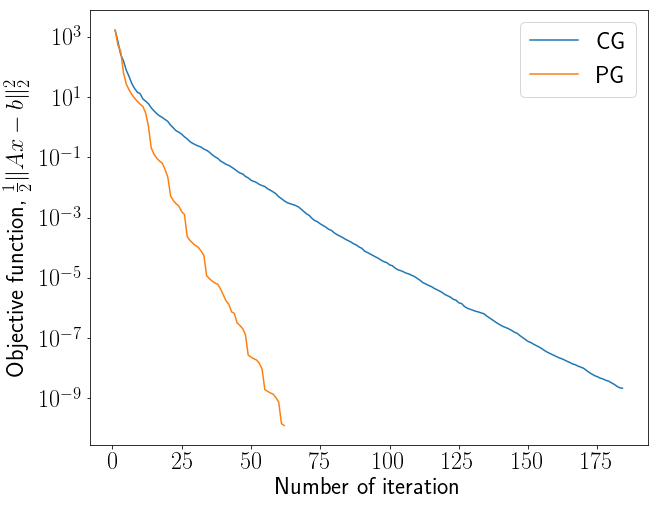

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)
y_hist_f_cg = [f(x) for x in cg.get_convergence()]
y_hist_f_pg = [f(x) for x in pg.get_convergence()]
myplot({"CG": range(1, len(y_hist_f_cg) + 1), "PG": range(1, len(y_hist_f_pg) + 1)},
       {"CG": y_hist_f_cg, "PG": y_hist_f_pg}, "Number of iteration",
       r"Objective function, $\frac{1}{2}\|Ax - b\|^2_2$")

In [9]:
import cvxpy as cvx

x = cvx.Variable(n)
obj = cvx.Minimize(0.5 * cvx.norm(A * x - b, 2)**2)
constr = [x >= 0, x <= 1]
problem = cvx.Problem(objective=obj, constraints=constr)
value = problem.solve()
x_cvx = np.array(x.value).ravel()
print("CVX optimal value =", value)

CVX optimal value = 5.846140959946567e-14


### Dependence of running time and number of iterations on the required tolerance

In [11]:
eps = [10**(-i) for i in range(8)]
time_pg = np.zeros(len(eps))
time_cg = np.zeros(len(eps))
iter_pg = np.zeros(len(eps))
iter_cg = np.zeros(len(eps))
pg = cs.ProjectedGD(f, grad, projection, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
cg = cs.FrankWolfe(f, grad, linsolver, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
for i, tol in tqdm(enumerate(eps)):
    res = %timeit -o -q pg.solve(x0=x0, tol=tol, max_iter=100000)
    time_pg[i] = res.average
    iter_pg[i] = len(pg.get_convergence())
    res = %timeit -o -q cg.solve(x0=x0, tol=tol, max_iter=100000)
    time_cg[i] = res.average
    iter_cg[i] = len(cg.get_convergence())

8it [01:33, 11.70s/it]


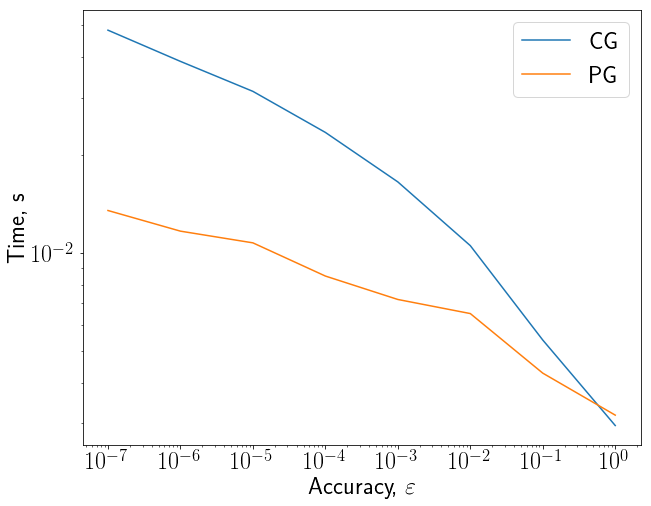

In [12]:
myplot({"CG":eps, "PG": eps}, {"CG": time_cg, "PG": time_pg}, r"Accuracy, $\varepsilon$", "Time, s", xscale="log")

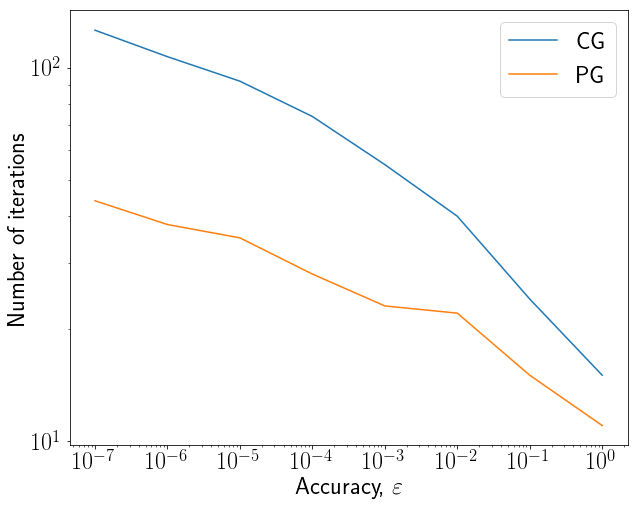

In [13]:
myplot({"CG":eps, "PG": eps}, {"CG": iter_cg, "PG": iter_pg}, r"Accuracy, $\varepsilon$", "Number of iterations", xscale="log")

## Example 2
 Consider the following problem: 
\begin{equation*}
\begin{split}
& \min \frac{1}{2}\|Ax - b \|^2_2 \\
\text{s.t. } & \| x\|_1 \leq 1 \\
& x_i \geq 0
\end{split}
\end{equation*}

In [14]:
def linsolver(gradient):
    x = np.zeros(gradient.shape[0])
    idx_min = np.argmin(gradient)
    if gradient[idx_min] > 0:
        x[idx_min] = 0
    else:
        x[idx_min] = 1
    return x

In [15]:
def projection(y):
    x = y.copy()
    if np.all(x >= 0) and np.sum(x) <= 1:
        return x
    x = np.clip(x, 0, np.max(x))
    if np.sum(x) <= 1:
        return x
    n = x.shape[0]
    bget = False
    x.sort()
    x = x[::-1]
    temp_sum = 0
    t_hat = 0
    for i in range(n - 1):
        temp_sum += x[i]
        t_hat = (temp_sum - 1.0) / (i + 1)
        if t_hat >= x[i + 1]:
            bget = True
            break
    if not bget:
        t_hat = (temp_sum + x[n - 1] - 1.0) / n
    return np.maximum(y - t_hat, 0)

In [30]:
x0 = np.random.rand(n) * 10
x0 = x0 / x0.sum()
cg = cs.FrankWolfe(f, grad, linsolver, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
x_cg = cg.solve(x0=x0, max_iter=200, tol=1e-10)
print("Optimal value CG =", f(x_cg))

Optimal value CG = 3007.501708711499


In [31]:
pg = cs.ProjectedGD(f, grad, projection, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
x_pg = pg.solve(x0=x0, max_iter=200, tol=1e-10)
print("Optimal value PG =", f(x_pg))

Optimal value PG = 3007.5017087083984


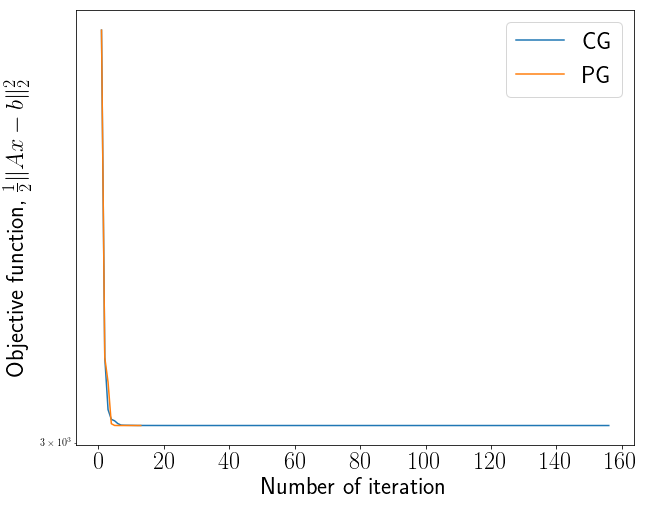

In [32]:
y_hist_f_cg = [f(x) for x in cg.get_convergence()]
y_hist_f_pg = [f(x) for x in pg.get_convergence()]
myplot({"CG": range(1, len(y_hist_f_cg) + 1), "PG": range(1, len(y_hist_f_pg) + 1)},
       {"CG": y_hist_f_cg, "PG": y_hist_f_pg}, "Number of iteration",
       r"Objective function, $\frac{1}{2}\|Ax - b\|^2_2$")

### Dependence of running time and number of iterations on the required tolerance

In [22]:
eps = [10**(-i) for i in range(8)]
time_pg = np.zeros(len(eps))
time_cg = np.zeros(len(eps))
iter_pg = np.zeros(len(eps))
iter_cg = np.zeros(len(eps))
pg = cs.ProjectedGD(f, grad, projection, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
cg = cs.FrankWolfe(f, grad, linsolver, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
for i, tol in tqdm(enumerate(eps)):
    res = %timeit -o -q pg.solve(x0=x0, tol=tol, max_iter=100000)
    time_pg[i] = res.average
    iter_pg[i] = len(pg.get_convergence())
    res = %timeit -o -q cg.solve(x0=x0, tol=tol, max_iter=100000)
    time_cg[i] = res.average
    iter_cg[i] = len(cg.get_convergence())

8it [01:19,  9.95s/it]


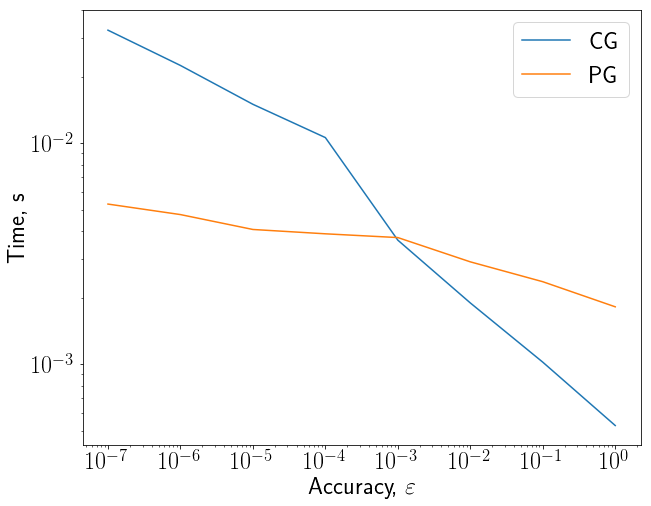

In [23]:
myplot({"CG":eps, "PG": eps}, {"CG": time_cg, "PG": time_pg}, 
       r"Accuracy, $\varepsilon$", "Time, s", xscale="log")

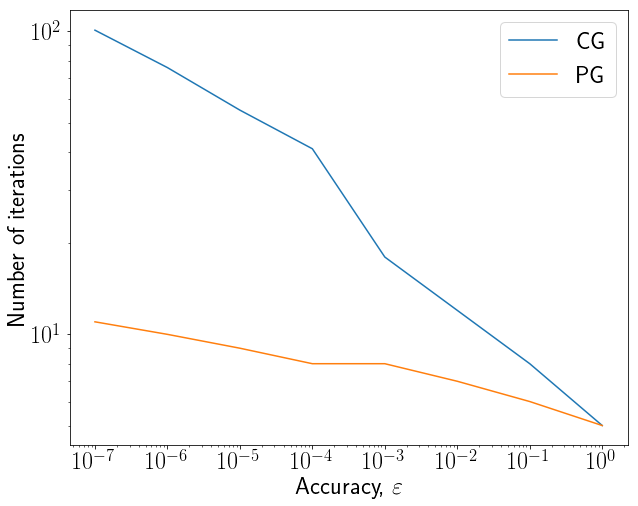

In [24]:
myplot({"CG":eps, "PG": eps}, {"CG": iter_cg, "PG": iter_pg}, 
       r"Accuracy, $\varepsilon$", "Number of iterations", xscale="log")

In [25]:
x = cvx.Variable(n)
obj = cvx.Minimize(0.5 * cvx.norm2(A * x - b)**2)
constr = [cvx.norm(x, 1) <= 1, x >= 0]
problem = cvx.Problem(objective=obj, constraints=constr)
value = problem.solve()
x_cvx = np.array(x.value).ravel()
print("CVX optimal value =", value)

CVX optimal value = 3007.501670877276


## Pro & Contra

Pro
- Estimate of convergence speed does not depend on dimensionality of the problem
- If feasible set is polyhedron, then $x_k$ is a convex combination of $k$ vertices of the polyhedron, therefore we have sparse solution in the case $k \ll n$
- If feasible set is a convex hull of some elements, then solution is a linear combination of elements from some subset of these elements
- Convergence estimate in objective is tight even for strongly convex functions 
- There is some analogue of the duality gap and theoretical results on convergence

Contra
- Convergence in function is only sublinear $\frac{C}{k}$
- Can not be generalized for non-smooth problems

## Recap

- Simple structure set
- Projection
- Projection gradient methos
- Frank-Wolfe method